<a href="https://colab.research.google.com/github/fedebaldasso/Data-Science/blob/main/Idea%2BBaldasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image 
import seaborn as sns
import pandas as pd
cols = list(pd.read_csv('ds_salaries.csv', nrows =1))
df = pd.read_csv('ds_salaries.csv')
df_sal = pd.read_csv('ds_salaries.csv', usecols =[i for i in cols if i != 'Unnamed: 0'])

In [ ]:
df_sal

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
from pandas.api.types import is_numeric_dtype
import numpy as np


def univariado(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #creo un dataframe con columnas especificas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #describe del df 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_completo = univariado(df_sal)
df_completo

In [ ]:
df_sal.describe(include='all').T

In [ ]:
!pip install sidetable

In [ ]:
import sidetable
df_sal.stb.freq(['job_title'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


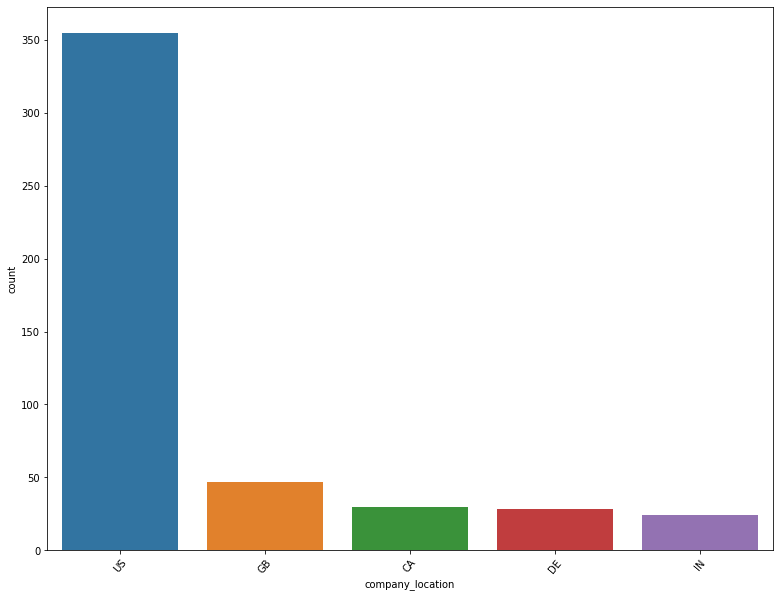

In [ ]:
# Donde se ubican la mayor cantidad de empresas donde trabajan los DataScience
plt.figure(figsize=(13, 10))
sns.countplot(df_sal.company_location.dropna(), order = df_sal.company_location.value_counts().iloc[:5].index);
plt.xticks(rotation=50);




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


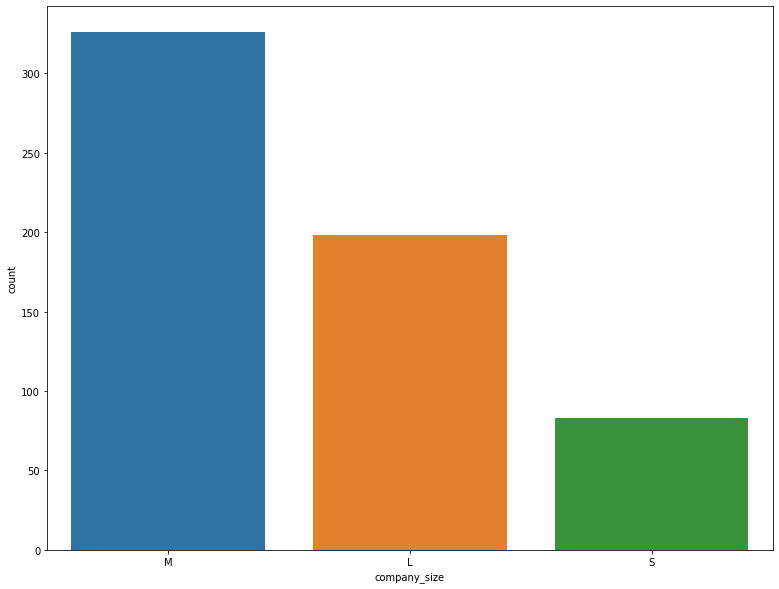

In [ ]:
# Cantidades de empresas por tamaño
plt.figure(figsize=(13, 10))
sns.countplot(df_sal.company_size.dropna(), order = df_sal.company_size.value_counts().iloc[:5].index);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


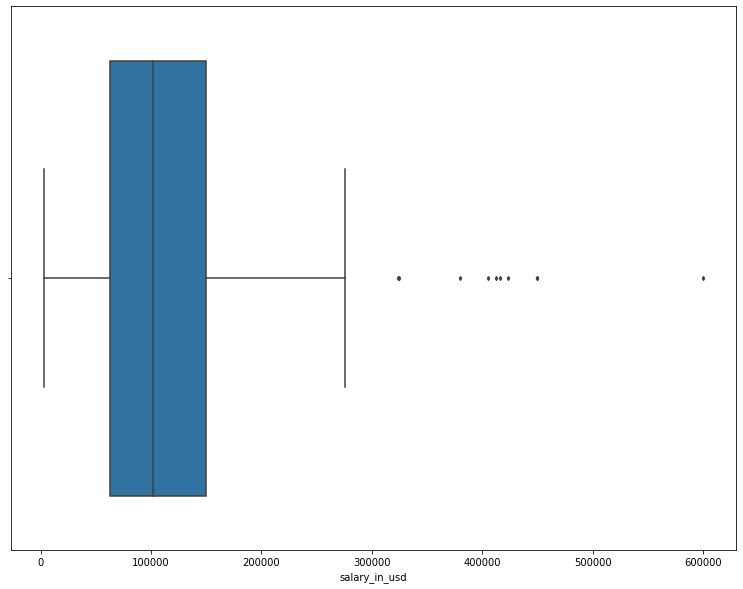

In [ ]:
# Como se distribuyen los salarios en dolares de los datascience
from seaborn import boxplot
plt.figure(figsize=(13, 10))
boxplot(df_sal.salary_in_usd, orient="v",fliersize=3,);